<a href="https://colab.research.google.com/github/Noob919/PET-EXPERIMENT/blob/main/modified_weight_loss_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense
from keras import Sequential
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df =  pd.read_csv("/content/MODIFIED PET MP.csv")
df.drop(0, inplace=True)
df.rename(columns={'Unnamed: 5': "label"}, errors="raise",inplace =  True)
df_na = df.dropna()
df_na.tail(5)
df_res =  df_na[['time', 'tem', 'heating rate', 'Weight loss']]
df_res.tail(3)

label = df_na['label']
label = label.reset_index()
def root_series(df):
  df_sq = df*df
  df_sum = df_sq.sum(axis=1)
  root =  pd.Series(data  = df_sum)
  root = pd.DataFrame(np.power(root, 0.5), columns = ['Root'])
  return root

def transformation(DataFrame):
  scaler  = Normalizer()
  transform_df = scaler.fit_transform(DataFrame)
  return transform_df

transform_df = transformation(df_res)
transform_df = pd.DataFrame(transform_df)
transform_df.columns = ['time', 'tem', 'heating rate', 'Weight loss']
transform_df
dataframe = pd.concat([transform_df,label],axis =1)
dataframe
df_training = dataframe.loc[dataframe['label'] == "Training"]
X =  df_training[['time', 'tem', 'heating rate']]
y = df_training['Weight loss']

In [4]:
model = keras.Sequential(
    [
        layers.Dense(3, activation="relu"),
        layers.Dense(6, activation="relu"),
        layers.Dense(8, activation="sigmoid"),
        layers.Dense(1),
    ]
)
model.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.fit(X, y, epochs=50, batch_size=10, verbose=1, validation_split=0.4)

Epoch 1/50
193/193 [==============================] - 1s 2ms/step - loss: 0.0024 - root_mean_squared_error: 0.0489 - val_loss: 0.0112 - val_root_mean_squared_error: 0.1058
Epoch 2/50
193/193 [==============================] - 0s 2ms/step - loss: 0.0017 - root_mean_squared_error: 0.0414 - val_loss: 0.0091 - val_root_mean_squared_error: 0.0956
Epoch 3/50
193/193 [==============================] - 0s 2ms/step - loss: 0.0014 - root_mean_squared_error: 0.0379 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0915
Epoch 4/50
193/193 [==============================] - 0s 2ms/step - loss: 0.0011 - root_mean_squared_error: 0.0337 - val_loss: 0.0085 - val_root_mean_squared_error: 0.0922
Epoch 5/50
193/193 [==============================] - 0s 2ms/step - loss: 8.4212e-04 - root_mean_squared_error: 0.0290 - val_loss: 0.0066 - val_root_mean_squared_error: 0.0815
Epoch 6/50
193/193 [==============================] - 0s 2ms/step - loss: 6.0275e-04 - root_mean_squared_error: 0.0246 - val_loss: 0.006

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 6)                 24        
                                                                 
 dense_2 (Dense)             (None, 8)                 56        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 101 (404.00 Byte)
Trainable params: 101 (404.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
met_df  = pd.DataFrame(model.history.history)

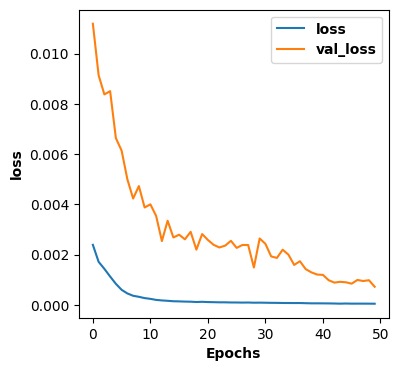

In [7]:
plt.figure(figsize=(4, 4))  # Set the figure size to 4x4

plt.plot(met_df['loss'], label='loss')
plt.plot(met_df['val_loss'], label='val_loss')
plt.xlabel('Epochs',fontsize=10, fontweight='bold')
plt.ylabel('loss',fontsize=10, fontweight='bold')
legend = plt.legend()
for text in legend.get_texts():
    text.set_fontweight('bold')



# Show the plot
plt.show()

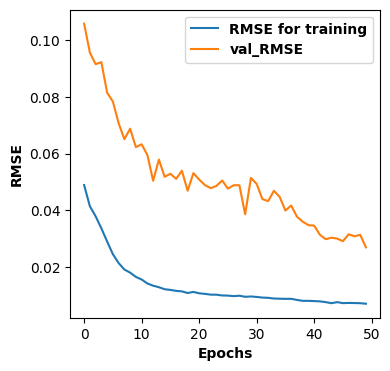

In [8]:
plt.figure(figsize=(4, 4))  # Set the figure size to 4x4

plt.plot(met_df['root_mean_squared_error'], label='RMSE for training')
plt.plot(met_df['val_root_mean_squared_error'], label='val_RMSE')
plt.xlabel('Epochs',fontsize=10, fontweight='bold')
plt.ylabel('RMSE',fontsize=10, fontweight='bold')
legend = plt.legend()
for text in legend.get_texts():
    text.set_fontweight('bold')


# Show the plot
plt.show()

In [9]:
df_val = dataframe.loc[dataframe['label'] == "Validation"]
X_val =  df_val[['time', 'tem', 'heating rate']]
y_val = df_val['Weight loss']

X_val_df = pd.DataFrame(X_val)
X_val_df = X_val_df.reset_index(drop = True)
predictions = model.predict(X_val)
prediction = pd.DataFrame(predictions)
y_val_df =  pd.DataFrame(y_val)
y_val_df = y_val_df.reset_index(drop= True)
final_df = pd.concat([X_val_df,prediction,y_val_df],axis =1)
final_df.rename(columns={0: "preditions"}, errors="raise",inplace =  True)
final_df.head(3)

13/13 [==============================] - 0s 1ms/step


,time,tem,heating rate,preditions,Weight loss
0,0.000015,0.066503,0.997547,0.054056,0.021829
1,0.000410,0.342108,0.933021,0.088312,0.111508
2,0.001133,0.536705,0.825700,0.136925,0.173681


In [10]:
print('MSE',mean_squared_error(y_val,predictions))
print('RMSE',math.sqrt(mean_squared_error(y_val, predictions)))
print('MAE',mean_absolute_error(y_val,predictions))
print('R2_Score',r2_score(y_val,predictions))

MSE 0.0003283747929970124
RMSE 0.018121114562769377
MAE 0.01415574361948711
R2_Score 0.9191784938115428


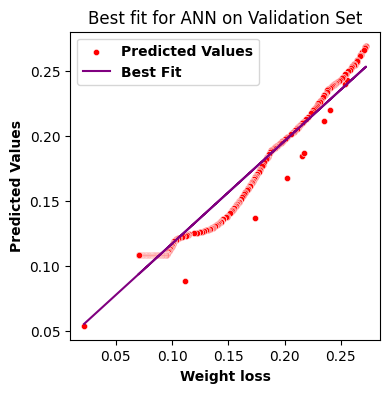

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Assuming you have the data in 'x' and 'y' (replace with your actual data)
x = final_df['Weight loss']
y = final_df['preditions']

plt.figure(figsize=(4, 4))  # Set the figure size to 4x4

# Create a scatter plot using Seaborn with custom styling
sns.scatterplot(data=final_df, x='Weight loss', y='preditions', color='red', label='Predicted Values', s=20)

# Calculate the best-fit line coefficients
a, b = np.polyfit(x, y, 1)

# Plot the best fit line
plt.plot(x, a * x + b, color='purple', label='Best Fit')

# Set the title and legend
plt.title('Best fit for ANN on Validation Set')
plt.xlabel('Weight loss', fontsize=10, fontweight='bold')
plt.ylabel('Predicted Values', fontsize=10, fontweight='bold')
legend = plt.legend()
for text in legend.get_texts():
    text.set_fontweight('bold')

# Show the plot
plt.show()

In [12]:
df_test = dataframe.loc[dataframe['label'] == "Test"]
X_test =  df_test[['time', 'tem', 'heating rate']]
y_test = df_test['Weight loss']

predictions = model.predict(X_test)
prediction_test  = pd.DataFrame(predictions)
print('MSE',mean_squared_error(y_test,predictions))
print('RMSE',math.sqrt(mean_squared_error(y_test, predictions)))
print('MAE',mean_absolute_error(y_test,predictions))
print('R2_Score',r2_score(y_test,predictions))

13/13 [==============================] - 0s 926us/step
MSE 0.0003374673064628568
RMSE 0.01837028324394746
MAE 0.014419742869178145
R2_Score 0.9184592684257726


In [13]:
X_test_df = pd.DataFrame(X_test)
X_test_df = X_test_df.reset_index(drop = True)
prediction = pd.DataFrame(predictions)
y_test_df =  pd.DataFrame(y_test)
y_test_df = y_test_df.reset_index(drop= True)
final_df_test = pd.concat([X_test_df,prediction,y_test_df],axis =1)
final_df_test.rename(columns={0: "predictions_test"}, errors="raise",inplace =  True)
final_df_test

,time,tem,heating rate,predictions_test,Weight loss
0,9.121918e-07,0.016664,0.999846,0.051685,0.005473
1,7.291845e-05,0.148165,0.987769,0.060394,0.048564
2,1.283030e-04,0.195713,0.978567,0.065520,0.064056
3,3.428455e-04,0.314557,0.943672,0.083181,0.102649
4,5.191274e-04,0.381633,0.915920,0.096400,0.124281
...,...,...,...,...,...
401,6.883534e-02,0.994973,0.015075,0.108435,0.071153
402,6.896480e-02,0.994992,0.014970,0.108435,0.070787
403,6.897134e-02,0.994992,0.014966,0.108435,0.070776
404,6.897715e-02,0.994993,0.014962,0.108435,0.070764


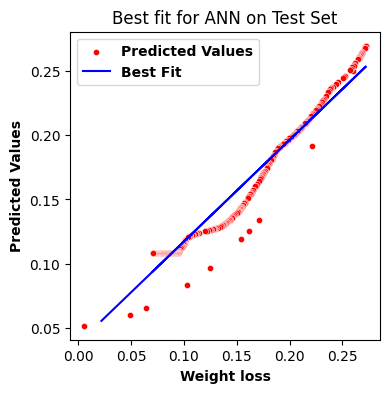

In [14]:
plt.figure(figsize=(4, 4))  # Set the figure size to 4x4

# Create a scatter plot using Seaborn with custom styling
sns.scatterplot(data=final_df_test, x='Weight loss', y='predictions_test', color='red', label='Predicted Values', s=20)

# Calculate the best-fit line coefficients
a, b = np.polyfit(x, y, 1)

# Plot the best fit line with a dark color
plt.plot(x, a * x + b, color='blue', label='Best Fit')

# Set the title and legend
plt.title('Best fit for ANN on Test Set')
plt.xlabel('Weight loss',fontsize=10, fontweight='bold')
plt.ylabel('Predicted Values',fontsize=10, fontweight='bold')
legend = plt.legend()
for text in legend.get_texts():
    text.set_fontweight('bold')


# Show the plot
plt.show()

In [15]:
from tensorflow.keras.utils import plot_model

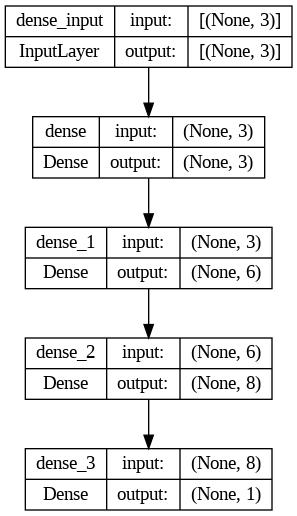

In [16]:
plot_model(model, to_file='/content/model.jpg',show_shapes=True)